In [7]:
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [8]:
df = pl.read_parquet("../data/geocoded_addresses.parquet")

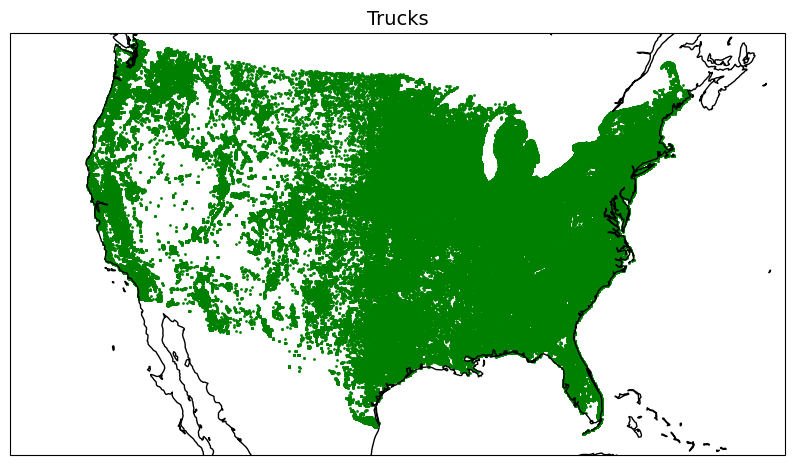

In [21]:
gdf = gpd.GeoDataFrame(
    df.to_pandas(),  # convert polars → pandas
    geometry=gpd.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:4326"  # WGS84 (lat/lon)
)

us_albers = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5)
gdf_proj = gdf.to_crs(us_albers.proj4_init)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': us_albers})
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # lower 48 bounds


gdf_proj.plot(ax=ax, markersize=1, color="green", transform=us_albers)

ax.coastlines(resolution="50m")
ax.set_title("Trucks", fontsize=14)
plt.show()


In [19]:
df["match_type"].value_counts(normalize=True)

match_type,proportion
cat,f64
"""Non_Exact""",0.346964
"""Exact""",0.554866
null,0.098171


In [20]:
55 / (55 + 34)


0.6179775280898876

In [ ]:
¢ 